TOPIC:**DIABETES PREDICTION** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Description:
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Step 0: Import libraries and Dataset

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df=pd.read_csv('/content/drive/MyDrive/diabetes_proj.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,1.288,33,1


In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#Step 1: Descriptive Statistics

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             765 non-null    float64
 3   SkinThickness             758 non-null    float64
 4   Insulin                   744 non-null    float64
 5   BMI                       762 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [ ]:
# Dataset dimensions - (rows, columns)
df.shape

(768, 9)

In [ ]:

# Statistical summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,765.000000,758.000000,744.000000,762.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.376471,20.807388,75.544355,31.935039,0.463283,33.240885,0.348958
std,3.369578,31.972618,18.902186,15.880493,99.627804,7.486766,0.305660,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.500000,32.000000,0.370500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.624500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,600.000000,59.400000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                3
SkinThickness               10
Insulin                     24
BMI                          6
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

**Observations**



* There are a total of 768 records and 9 features in the dataset.
* Each feature can be either of integer or float dataype.
* Some features like SkinTHickness, Blood pressure , Insulin, BMI have NaN values which represent missing data.

* In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.







#Step 2: Data Preprocessing


**Replacing NaN with mean values**

In [ ]:

df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:

# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.0000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.2500,199.00
BloodPressure,768.0,69.376471,18.865183,0.000,64.00000,72.0000,80.0000,122.00
SkinThickness,768.0,20.807388,15.776630,0.000,0.00000,23.0000,32.0000,99.00
Insulin,768.0,75.544355,98.056702,0.000,0.00000,45.5000,125.0000,600.00
BMI,768.0,31.935039,7.457425,0.000,27.37500,32.0000,36.5000,59.40
DiabetesPedigreeFunction,768.0,0.463283,0.305660,0.078,0.24375,0.3705,0.6245,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.0000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.0000,1.00


detecting and removing outliers


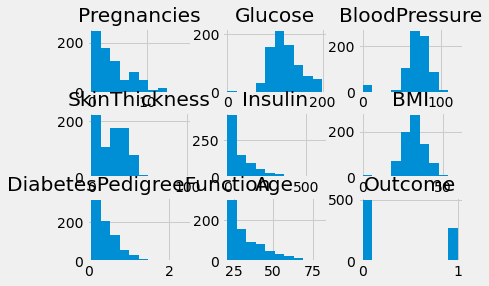

In [ ]:
df.hist();

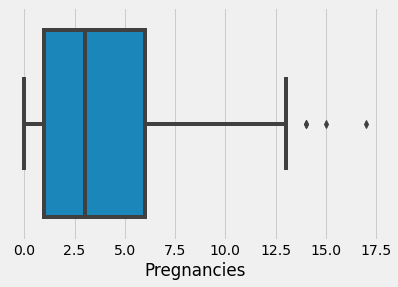

In [ ]:
sns.boxplot(df['Pregnancies']); 

**As the mean value is highly influenced by the outliers and skewed data, it is advised to replace the outliers with the median value.**

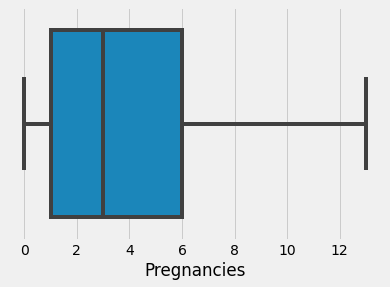

In [ ]:
#removing outliers
q1 = df['Pregnancies'].quantile(0.25)
q3 = df['Pregnancies'].quantile(0.75)
iqr = q3 - q1
df.loc[(df['Pregnancies']  > (q3 + (1.5 * iqr)) ) | (df['Pregnancies'] < (q1 - (1.5 * iqr))), ['Pregnancies']] = df['Pregnancies'].median()
sns.boxplot(df['Pregnancies']); #plotting after remiving ouliers

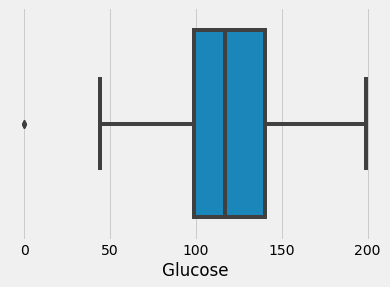

In [ ]:
sns.boxplot(df['Glucose']); 

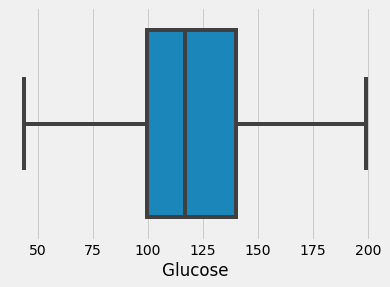

In [ ]:
q1 = df['Glucose'].quantile(0.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3 - q1
df.loc[(df['Glucose']  > (q3 + (1.5 * iqr)) ) | (df['Glucose'] < (q1 - (1.5 * iqr))), ['Glucose']] = df['Glucose'].median()
sns.boxplot(df['Glucose']); #plotting after removing outliers

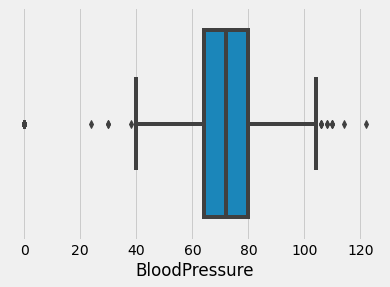

In [ ]:
sns.boxplot(df['BloodPressure']); 

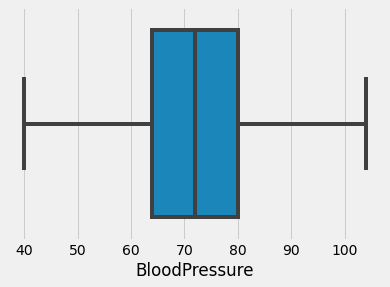

In [ ]:
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3 - q1
df.loc[(df['BloodPressure']  > (q3 + (1.5 * iqr)) ) | (df['BloodPressure'] < (q1 - (1.5 * iqr))), ['BloodPressure']] = df['BloodPressure'].median()
sns.boxplot(df['BloodPressure']); #plotting after remiving ouliers

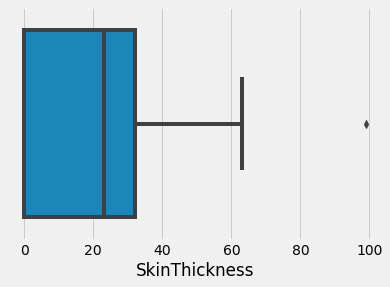

In [ ]:
sns.boxplot(df['SkinThickness']); 

0.0
0.0


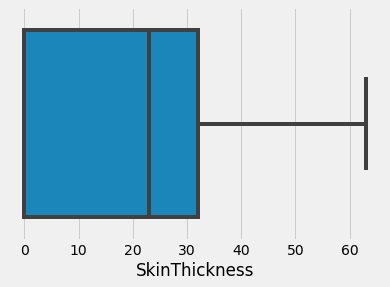

In [ ]:
q1 = df['SkinThickness'].quantile(0.25)
q3 = df['SkinThickness'].quantile(0.75)
iqr = q3 - q1
print(q1)
print(df['SkinThickness'].min())
df.loc[(df['SkinThickness']  > (q3 + (1.5 * iqr)) ) | (df['SkinThickness'] < (q1 - (1.5 * iqr))), ['SkinThickness']] = df['SkinThickness'].median()
sns.boxplot(df['SkinThickness']); #plotting after removing ouliers

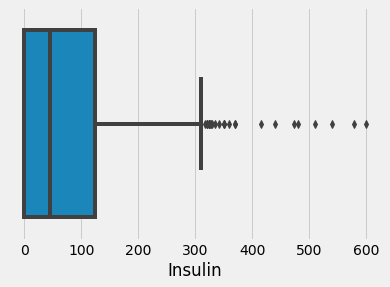

In [ ]:
sns.boxplot(df['Insulin']); 

0.0
0.0


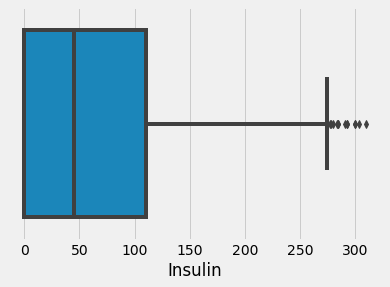

In [ ]:
q1 = df['Insulin'].quantile(0.25)
q3 = df['Insulin'].quantile(0.75)
print(q1)
print(df['Insulin'].min())
iqr = q3 - q1
df.loc[(df['Insulin']  > (q3 + (1.5 * iqr)) ) | (df['Insulin'] < (q1 - (1.5 * iqr))), ['Insulin']] = df['Insulin'].mean()
sns.boxplot(df['Insulin']); #plotting after remiving ouliers

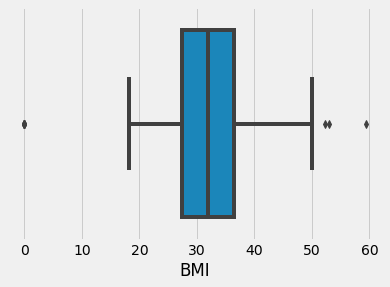

In [ ]:
sns.boxplot(df['BMI']); 

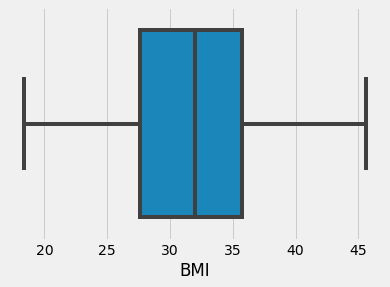

In [ ]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
df.loc[(df['BMI']  > (q3 + (1 * iqr)) ) | (df['BMI'] < (q1 - (1 * iqr))), ['BMI']] = df['BMI'].median()
sns.boxplot(df['BMI']); #plotting after remiving ouliers

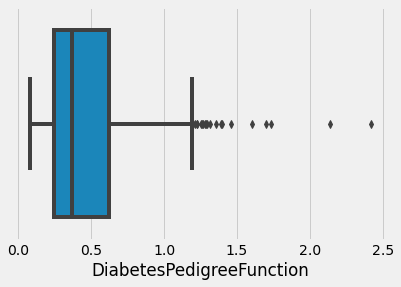

In [ ]:
sns.boxplot(df['DiabetesPedigreeFunction']); 

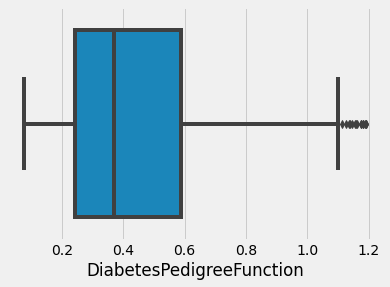

In [ ]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3 - q1
df.loc[(df['DiabetesPedigreeFunction']  > (q3 + (1.5 * iqr)) ) | (df['DiabetesPedigreeFunction'] < (q1 - (1.5 * iqr))), ['DiabetesPedigreeFunction']] = df['DiabetesPedigreeFunction'].mean()
sns.boxplot(df['DiabetesPedigreeFunction']); #plotting after removing ouliers

classification


In [ ]:

df.loc[df['Age']>50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45.000000,143.000000,30.5,0.158,53,1
9,8,125,96.0,20.807388,0.000000,32.0,0.232,54,1
12,10,139,80.0,0.000000,75.544355,27.1,1.041,57,0
13,1,189,60.0,23.000000,246.000000,30.1,0.398,59,1
14,5,166,72.0,19.000000,175.000000,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
719,5,97,76.0,27.000000,0.000000,35.6,0.378,52,1
734,2,105,75.0,0.000000,0.000000,23.3,0.560,53,0
757,0,123,72.0,0.000000,0.000000,36.3,0.258,52,1
759,6,190,92.0,0.000000,0.000000,35.5,0.278,66,1


sort a datatype

In [ ]:
df.sort_index

<bound method DataFrame.sort_index of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

n-largest

In [ ]:
df.nlargest(3,'Glucose',keep='first')
#used to get the first n rows ordered by columns in descending order

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76.0,43.0,0.0,42.9,0.463283,22,1
561,0,198,66.0,32.0,274.0,41.3,0.502000,28,1
8,2,197,70.0,45.0,143.0,30.5,0.158000,53,1


#Step 3: Data Visualization

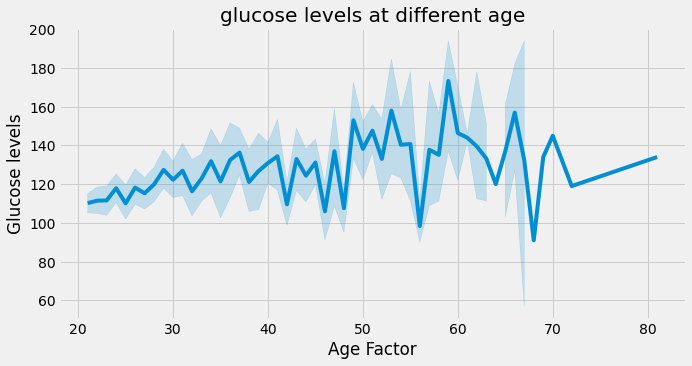

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.Age,y=df.Glucose,data=df)
plt.ylabel('Glucose levels')
plt.xlabel('Age Factor')
plt.title('glucose levels at different age');


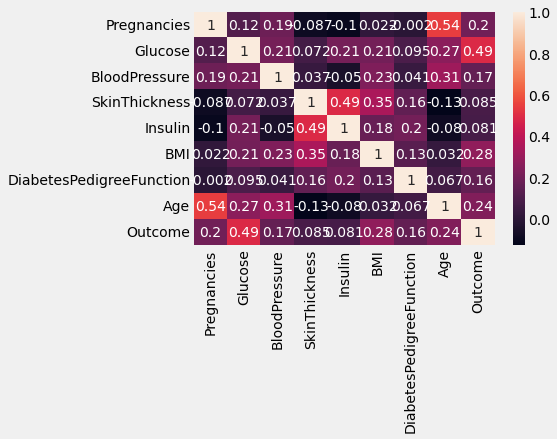

In [ ]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

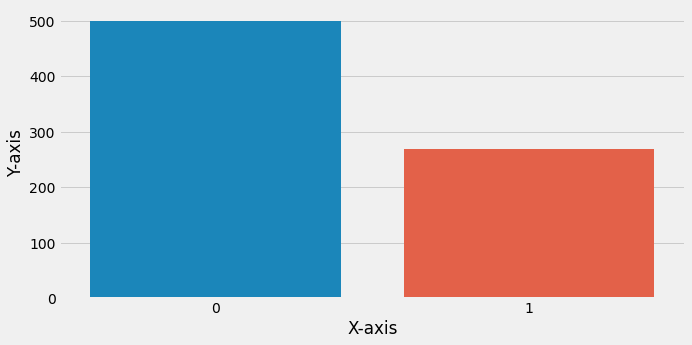

In [ ]:
# Outcome countplot
plt.figure(figsize=(10,5))
sns.countplot(x = 'Outcome',data = df);
plt.xlabel('X-axis');
plt.ylabel('Y-axis');

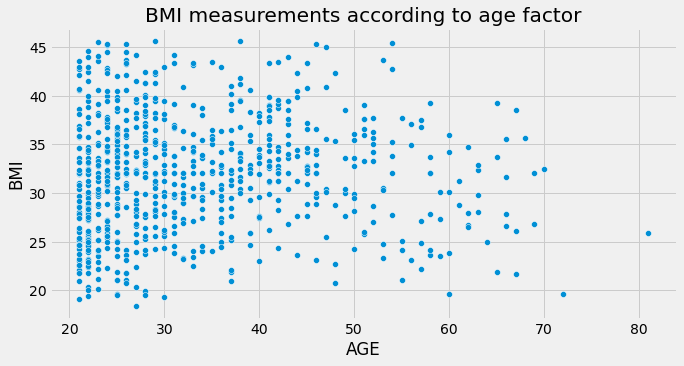

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=df.BMI,x=df.Age)
plt.style.use('fivethirtyeight')
plt.ylabel('BMI');
plt.xlabel('AGE');
plt.title("BMI measurements according to age factor");

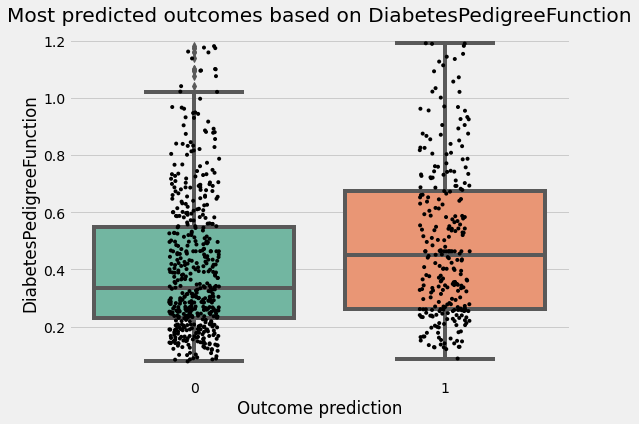

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x=df.Outcome , y=df.DiabetesPedigreeFunction, jitter=True , color="black" , size=4)

sns.boxplot(x=df.Outcome ,palette="Set2", y = df.DiabetesPedigreeFunction , color='black')
plt.xlabel('Outcome prediction');
plt.ylabel('DiabetesPedigreeFunction');
plt.title("Most predicted outcomes based on DiabetesPedigreeFunction");


#STEP 4: TRAINING AND FEATURE SELECTION

In [ ]:
inputs=df.drop('Outcome',axis=1)

In [ ]:
target=df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
x=inputs
y=target
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

len of X_train is 537
len of X_test is 231
len of y_train is 537
len of y_test is 231


In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,0,151,90.0,46.0,0.0,42.1,0.371,21
418,1,83,68.0,0.0,0.0,32.0,0.624,27
764,2,122,70.0,27.0,0.0,36.8,0.340,27
363,4,146,78.0,0.0,0.0,38.5,0.520,67
757,0,123,72.0,0.0,0.0,36.3,0.258,52
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.0,32.9,0.171,63
192,7,159,66.0,0.0,0.0,30.4,0.383,36
629,4,94,65.0,22.0,0.0,24.7,0.148,21
559,11,85,74.0,0.0,0.0,30.1,0.300,35


In [ ]:
X_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.122427,0.168976,-0.097677,-0.149412,-0.028667,-0.023228,0.534969
Glucose,0.122427,1.000000,0.202598,0.076523,0.220281,0.234794,0.079220,0.290616
BloodPressure,0.168976,0.202598,1.000000,0.025706,-0.069249,0.199366,0.040679,0.306991
SkinThickness,-0.097677,0.076523,0.025706,1.000000,0.507963,0.345846,0.144431,-0.174371
Insulin,-0.149412,0.220281,-0.069249,0.507963,1.000000,0.201147,0.177421,-0.114428
BMI,-0.028667,0.234794,0.199366,0.345846,0.201147,1.000000,0.141821,0.009634
DiabetesPedigreeFunction,-0.023228,0.079220,0.040679,0.144431,0.177421,0.141821,1.000000,0.077511
Age,0.534969,0.290616,0.306991,-0.174371,-0.114428,0.009634,0.077511,1.000000


Feature Selection- With Correlation

In [ ]:
def correlation(dataset, threshold):
    correlated_col = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_col.add(colname)
    return correlated_col

In [ ]:
corr_features = correlation(X_train, 0.6)
len(set(corr_features))

0

Feature Selection- Dropping constant features

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

finding non constant columns

In [ ]:
constant_columns=[column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]

In [ ]:
constant_columns

[]

AFTER PERFORMING FEATURE SELECTION WE CAN SAY THAT THERE ARE NO HIGHLY CORRELATED AND CONSTANT FEATURES

#STEP 5: NORMALIZATION

NORMALIZING TRAINING DATA

In [ ]:
from sklearn import preprocessing

normalizer=preprocessing.Normalizer()
train_normal=normalizer.fit_transform(X_train)
train_normal

array([[0.        , 0.8044837 , 0.4794936 , ..., 0.22429645, 0.00197658,
        0.11188184],
       [0.00868175, 0.72058523, 0.59035898, ..., 0.27781599, 0.00541741,
        0.23440724],
       [0.0133037 , 0.81152554, 0.46562941, ..., 0.24478803, 0.00226163,
        0.17959992],
       ...,
       [0.03309051, 0.77762705, 0.53772083, ..., 0.20433392, 0.00122435,
        0.17372519],
       [0.08995536, 0.69510963, 0.60515427, ..., 0.24615059, 0.00245333,
        0.28622161],
       [0.02838417, 0.77204951, 0.46550044, ..., 0.18165871, 0.00363317,
        0.39170159]])

NORMALIZING TESTING DATA

In [ ]:
test_normal=normalizer.transform(X_test)
test_normal

array([[0.00449232, 0.89397243, 0.34141661, ..., 0.19272069, 0.00208122,
        0.09883112],
       [0.01164699, 0.6231141 , 0.43093872, ..., 0.19566947, 0.00235269,
        0.13394041],
       [0.03743528, 0.71127032, 0.58024684, ..., 0.31819988, 0.0036593 ,
        0.2339705 ],
       ...,
       [0.00758768, 0.72082979, 0.45526092, ..., 0.1813456 , 0.0019728 ,
        0.166929  ],
       [0.00629501, 0.66727156, 0.47842112, ..., 0.23606305, 0.00124012,
        0.16367038],
       [0.05723828, 0.69830705, 0.4464586 , ..., 0.15797766, 0.0029306 ,
        0.25757227]])

#STEP 6: MACHINE LEARNING MODELS

**LOGISTIC REGRESSION**

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [ ]:
predictions=logreg.predict(X_test)

In [ ]:
from sklearn import metrics

print('accuracy score=', format(metrics.accuracy_score(y_test,predictions)))

accuracy score= 0.7575757575757576


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[138  19]
 [ 37  37]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.66      0.50      0.57        74

    accuracy                           0.76       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231



As shown Logistic regression gives an accuracy score of 0.7575757575757576

**DESCISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn import metrics

print('accuracy score=', format(metrics.accuracy_score(y_test,predictions)))

accuracy score= 0.7316017316017316


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[131  26]
 [ 36  38]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       157
           1       0.59      0.51      0.55        74

    accuracy                           0.73       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.72      0.73      0.73       231



As shown Decision tree giveas an accuracy score of 0.7316017316017316

---



In [ ]:
dtree.feature_importances_

array([0.04952106, 0.3250703 , 0.07151699, 0.09384946, 0.02906252,
       0.16551906, 0.10706756, 0.15839305])

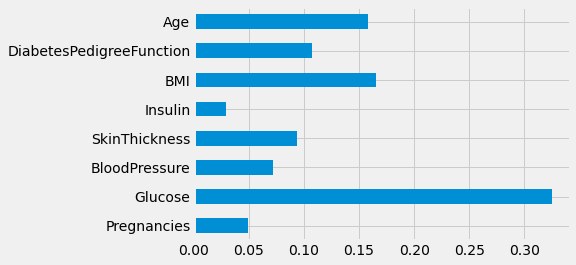

In [ ]:
(pd.Series(dtree.feature_importances_,index=inputs.columns).plot(kind='barh'))


The graph shows that the most important feature in this diabetes prediction is Glucose followed by AGE.

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
predictions=rfc.predict(X_test)

In [ ]:
from sklearn import metrics
print('ACCURACY SCORE=',format(metrics.accuracy_score(y_test,predictions)))

ACCURACY SCORE= 0.7748917748917749


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[139  18]
 [ 34  40]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.69      0.54      0.61        74

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.77      0.77      0.77       231



As shown RANDOM FOREST gives an accuracy score of 0.7878787878787878
 the highest score among all

In [ ]:
rfc.feature_importances_

array([0.07929106, 0.27110916, 0.08074402, 0.07542595, 0.06488337,
       0.1500088 , 0.1220718 , 0.15646584])

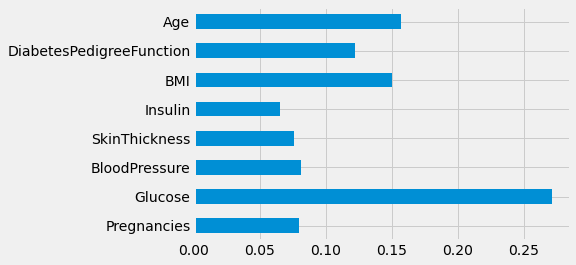

In [ ]:
(pd.Series(rfc.feature_importances_,index=inputs.columns).plot(kind='barh'))

The graph shows that the most important feature in this diabetes prediction is Glucose followed by BMI.

**SVM**

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy score = ",format(metrics.accuracy_score(y_test,svc_pred)))

Accuracy score =  0.7359307359307359


In [ ]:
from sklearn.metrics import  classification_report,confusion_matrix
 
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[140  17]
 [ 44  30]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       157
           1       0.64      0.41      0.50        74

    accuracy                           0.74       231
   macro avg       0.70      0.65      0.66       231
weighted avg       0.72      0.74      0.72       231



As shown SVM gives an accuracy score of 0.7359307359307359

#STEP7: HYPOTHESIS TESTING

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,75.544355,33.6,0.627000,50,1
1,1,85,66.0,29.000000,75.544355,26.6,0.351000,31,0
2,8,183,64.0,20.807388,0.000000,23.3,0.672000,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167000,21,0
4,0,137,40.0,35.000000,168.000000,43.1,0.463283,33,1


In [ ]:
df['BMI'].mean()

31.871237286745387

H0:μ =30

H1:μ != 30

*   create the hypothesis (Null and Alternate Hypothesis)

*   Appropriate statistical test

*    let set  α  as 0.1 i.e Type l error

*    Get data

*   Analyze

Since  H0: µ1 = µ2 and Ha: µ1≠µ2 it is  a two-tailed test

 For two-tailed tests, divide the alpha level by 2. In this example, the two tailed alpha would be .1/2 = 0.05
 *  1-0.05 = 0.95




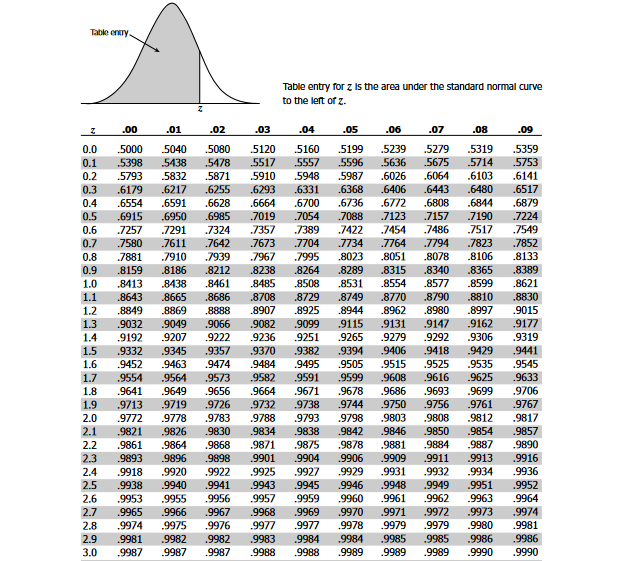


value of $z$ at .95 we know from $z table$ $\underline{+}$1.65

In [ ]:
df['BMI'].sample(70)

649    26.4
127    33.3
119    23.2
703    38.5
467    36.8
       ... 
487    32.0
414    34.6
297    30.7
261    30.0
407    21.9
Name: BMI, Length: 70, dtype: float64

In [ ]:
sampData=df['BMI'].sample(70)

In [ ]:
meanSampData=sampData.mean()
hypMean=30
N=70
standPop=np.std(df['BMI'])

In [ ]:
import math
(meanSampData-hypMean)/(standPop/math.sqrt(N))

2.439331501347629

* as calculated z score 2.85 is greater than 1.65 (tabular z score),reject the null hypothesis


* Observed value = 2.85

* Critical value = 1.65



**p-value (observed significance level)**

The decision rule for the p-value method:

* if p-value (p) > level of significance (α), we fail to reject Null Hypothesis
* if p-value (p) ≤ level of significance (α), we reject Null Hypothesis

**Example**

* let say observed z value is 2.85 = 0.9978

* The p-value would be 1-0.9978 = 0.0022

Since p-value 0.002 < 0.1 it is reject null hypothesis



**t-test for mean estimation of population**

The decision rule for the Test-statistic method:

* if test-statistic (t) > critical Value (C), we reject Null Hypothesis.
* If test-statistic (t) ≤ critical value (C), we fail to reject Null Hypothesis.

In [ ]:
import scipy.stats as st

In [ ]:
st.ttest_1samp(sampData,70)

Ttest_1sampResult(statistic=-52.15848091070103, pvalue=3.5960154384055353e-57)

In [ ]:
1.46 > 0.1  #we reject the null hypothesis

True